In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('50_Startups (3).csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.shape

(50, 5)

In [4]:
df1 = df.copy()

In [5]:
# check null values
def count_per_null(data):
    nv = data.isnull().sum()
    nv = nv[nv>0]
    nv_df = pd.DataFrame({'Features':nv.index,'Count_Null':nv.values,
                         'Per_Null': (nv.values/data.shape[0])*100})
    nv_df = nv_df.sort_values('Per_Null',ascending=False)
    return nv_df

In [6]:
nv_df = count_per_null(df)
nv_df

,Features,Count_Null,Per_Null


In [ ]:
# inference: no null values

In [7]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [8]:
df.dtypes.value_counts()

float64    4
object     1
dtype: int64

In [9]:
# separating categorical and continuous columns
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['State'], dtype='object')
Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')


In [10]:
nv_df

,Features,Count_Null,Per_Null


In [11]:
# Handling Duplicates
df.duplicated().sum()

0

In [12]:
df.drop_duplicates(inplace=True) ### if any
df.duplicated().sum()

0

In [13]:
df.shape

(50, 5)

In [ ]:
# id column ko drop kardo agar hai toh
df.drop('Id',axis=1,inplace=True)
df.shape


## Eploratory data analysis

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
print(cat_cols)

Index(['State'], dtype='object')


<Axes: xlabel='State', ylabel='count'>

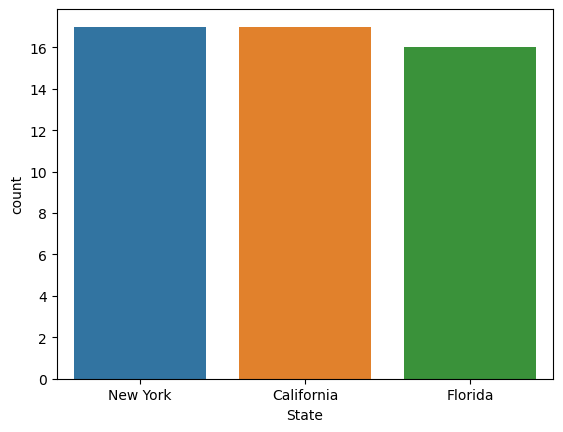

In [16]:
# univariate analysis- categorical feature
sns.countplot(x=df['State'])

In [ ]:
# inference:

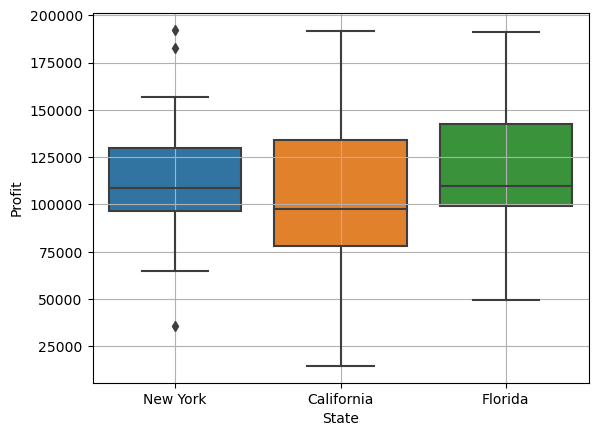

In [18]:
# Bivariate analysis
#BoxPlot 
sns.boxplot(x=df['State'],y=df['Profit'])
plt.grid()

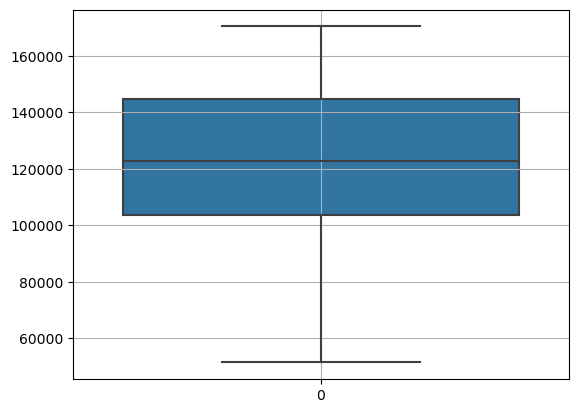

In [36]:
sns.boxplot(df['Administration'])
plt.grid()

C:\Users\win 8.1\AppData\Local\Temp\ipykernel_19448\1046794873.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


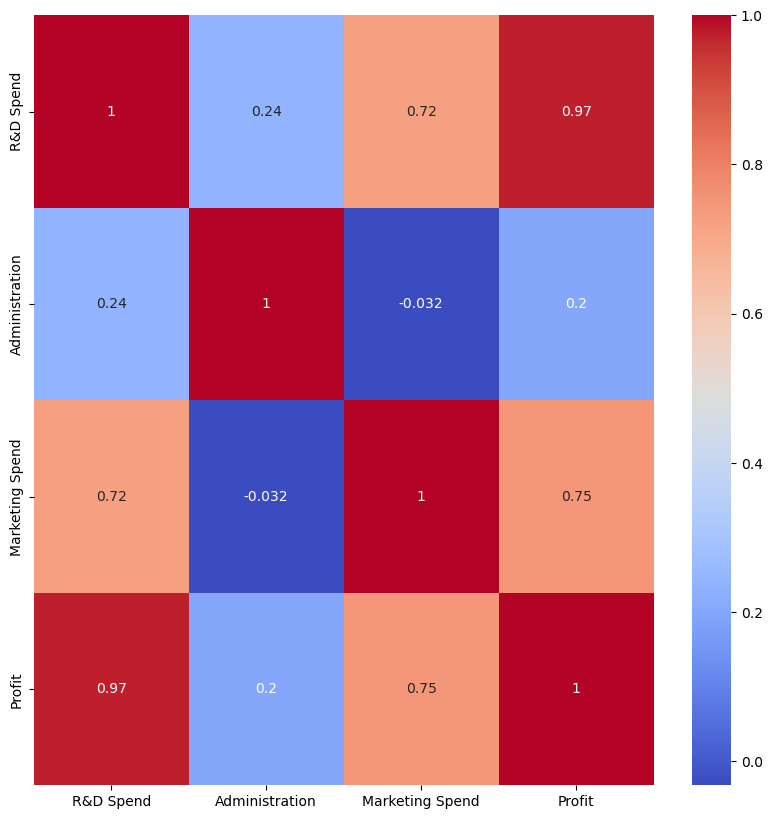

In [20]:
# correlation:
corr = df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

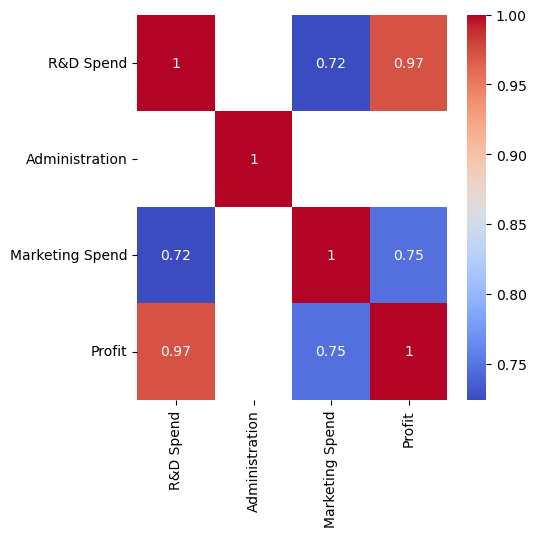

In [23]:
plt.figure(figsize=(5,5))
sns.heatmap(corr[abs(corr)>=0.7],annot=True,cmap='coolwarm')
plt.show()

In [ ]:
#inference:

In [24]:
df.drop(['Marketing Spend'],axis=1,inplace=True)
df.shape

(50, 4)

C:\Users\win 8.1\AppData\Local\Temp\ipykernel_19448\278595128.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Profit'])


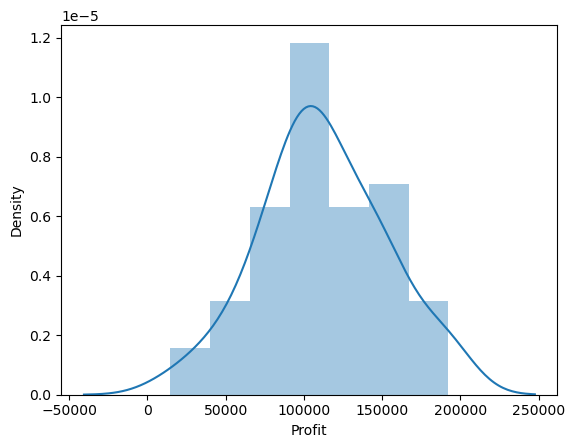

In [25]:
# checking normality of dependant feature
sns.distplot(df['Profit'])
plt.show()

In [26]:
from scipy.stats import shapiro

In [27]:
# Ho : Data is normally dist =>  p>0.05 => Ho is True
# H1 : Data is not normally dist => p<=0.05 
ts1,p1 = shapiro(df['Profit'])
print(ts1,p1)

0.9848828911781311 0.7665575742721558


In [ ]:
# as p value is greater than 0.05 therefore, the data is normally distributed

In [28]:
# Outlier Identification
num_cols = df.dtypes[df.dtypes!='object'].index
print(num_cols)

Index(['R&D Spend', 'Administration', 'Profit'], dtype='object')


In [29]:
df[num_cols].describe(percentiles=[0.01,0.02,0.03,0.04,0.05,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,50%,97%,98%,99%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,0.0000,0.0000,254.7635,520.3680,748.231,73051.080,158294.2907,162652.7300,164000.9650,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,51508.5449,51733.9498,58419.3966,65379.7388,73613.302,122699.795,157155.0650,158192.9528,170419.2564,182645.56
Profit,50.0,112012.6392,40306.180338,14681.40,24967.4849,35253.5698,38909.9804,42284.2772,45678.689,107978.190,191443.4751,191801.4554,192031.6427,192261.83


In [30]:
def ol_treatment_low_end(x):
    x = x.clip(lower = x.quantile(0.01))
    return x

def ol_treatment_upper_end(x):
    x = x.clip(upper = x.quantile(0.99))
    return x

In [31]:
lower_end = ['Administration','Profit']

upper_end = ['R&D Spend','Administration','Profit']

In [32]:
df[lower_end] = df[lower_end].apply(ol_treatment_low_end)
df[upper_end] = df[upper_end].apply(ol_treatment_upper_end)

In [33]:
df[num_cols].describe(percentiles=[0.01,0.02,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,50%,97%,98%,99%,max
R&D Spend,50.0,73694.650900,45847.696114,0.0000,0.000000,0.000000,73051.080,158294.2907,162625.765300,163313.365150,164000.9650
Administration,50.0,121104.621626,27509.170059,51508.5449,51623.501399,51738.457898,122699.795,157155.0650,157948.426728,164183.841564,170419.2564
Profit,50.0,112213.757152,39813.184960,24967.4849,30213.388199,35459.291498,107978.190,191443.4751,191796.851654,191914.247177,192031.6427


In [37]:
# Encoding categorical columns
cat_cols = df.dtypes[df.dtypes=='object'].index
print(cat_cols)

Index(['State'], dtype='object')


In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [40]:
lb = LabelEncoder()
df['State'] = lb.fit_transform(df1['State'])
df['State'].value_counts()

2    17
0    17
1    16
Name: State, dtype: int64

In [41]:
df.dtypes

R&D Spend         float64
Administration    float64
State               int32
Profit            float64
dtype: object

In [43]:
#Select x(independent feature) and y(dependent feature)
x = df.drop('Profit',axis=1)  
y = np.log(df['Profit'])
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(50, 3)
(50,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [44]:
# OLS Model -1
import statsmodels.api as sm  

In [45]:
x1 = x.copy()
y1 = y.copy()
print(x1.shape)
print(y1.shape)

(50, 3)
(50,)


In [46]:
x1 = sm.add_constant(x1)
ols_model1 = sm.OLS(y1,x1).fit()
ols_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     79.37
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           3.29e-18
Time:                        16:39:28   Log-Likelihood:                 18.240
No. Observations:                  50   AIC:                            -28.48
Df Residuals:                      46   BIC:                            -20.83
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             10.9150      0.117     93.311      0.000      10.680      11.150
R&D Spend       8.389e-06   5.66e-07     14.810      0.000    7.25e-06    9.53e-06
Administration  8.358e-08   9.39e-07      0.089      0.929   -1.81e-06    1.97e-06
State              0.0096      0.030      0.317      0.752      -0.051       0.070
==============================================================================
Omnibus:                       47.827   Durbin-Watson:                   0.439
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.257
Skew:                          -2.501   Prob(JB):                     4.92e-47
Kurtosis:                      11.794   Cond. No.                     6.94e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
cols_with_high_p=['Administration','State']

In [47]:
print(type(ols_model1.pvalues))
ols_p = ols_model1.pvalues
ols_p

<class 'pandas.core.series.Series'>


const             4.396428e-54
R&D Spend         4.012881e-19
Administration    9.294641e-01
State             7.524854e-01
dtype: float64

In [90]:
cols_with_high_p = ols_p[ols_p>0.8].index
print(len(cols_with_high_p))
print(cols_with_high_p)

1
Index(['Administration'], dtype='object')


In [91]:
print(ols_model1.rsquared)
print(ols_model1.rsquared_adj)

0.8380854480916863
0.8275258034020136


In [92]:
# OLS Model-2
x2 = x.drop(cols_with_high_p,axis=1)
y2 = y1.copy()
print(x2.shape)
print(y2.shape)

(50, 2)
(50,)


In [93]:
x2 = sm.add_constant(x2)
ols_model2 = sm.OLS(y2,x2).fit()
ols_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     121.6
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           2.63e-19
Time:                        17:01:51   Log-Likelihood:                 18.235
No. Observations:                  50   AIC:                            -30.47
Df Residuals:                      47   BIC:                            -24.73
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.9242      0.053    204.780      0.000      10.817      11.032
R&D Spend   8.402e-06   5.43e-07     15.475      0.000    7.31e-06    9.49e-06
State          0.0095      0.030      0.319      0.751      -0.051       0.070
==============================================================================
Omnibus:                       47.938   Durbin-Watson:                   0.439
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.953
Skew:                          -2.509   Prob(JB):                     3.47e-47
Kurtosis:                      11.804   Cond. No.                     1.97e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
print('Model 2')
print(ols_model2.rsquared)
print(ols_model2.rsquared_adj)

print('Model 1')
print(ols_model1.rsquared)
print(ols_model1.rsquared_adj)

Model 2
0.8380575638069876
0.8311663963094126
Model 1
0.8380854480916863
0.8275258034020136


In [95]:
#Linear Regression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [96]:
def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mse)
    r2s = r2_score(ytest,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2 Score',r2s)

In [97]:
x3 = x.drop(cols_with_high_p,axis=1)
y3 = y.copy()
print(x3.shape)
print(y3.shape)

(50, 2)
(50,)


In [98]:
# split data into test and train data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x3,y3,test_size=0.30,
                                                random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(35, 2)
(15, 2)
(35,)
(15,)


In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
lr1 = LinearRegression()  # lr1 is the instance or object of LienarRegression()
lr1.fit(x_train,y_train)

LinearRegression()

In [101]:
# Coefficient and Intercepts
m = lr1.coef_
c = lr1.intercept_
print('Intercept',c)
print(len(m))
print('Coefficients\n',m)

Intercept 10.901175815588497
2
Coefficients
 [8.19326877e-06 4.41532868e-02]


In [102]:
ypred_lr1 = lr1.predict(x_test)
eval_model(y_test,ypred_lr1)

MAE 0.10960848373371436
MSE 0.025820057918195038
RMSE 0.16068620948356158
R2 Score 0.8356398814613557


In [103]:
print('Train Score',lr1.score(x_train,y_train))  # Train R2 Score
print('Test Score',lr1.score(x_test,y_test))

Train Score 0.8319042424034047
Test Score 0.8356398814613557


In [106]:
#Saving the model
# Saving Lin Reg Model - Serialization
import pickle
pickle.dump(lr1,open('50_startups.pkl','wb'))  # wb = write binary

# Saving Ridge Model
# pickle.dump(rid1, open('50_startups.pkl','wb'))

In [108]:
# Deserialization
linreg_model = pickle.load(open('50_startups.pkl','rb'))  # rb = read binary

In [ ]:
# pickling